In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from json_parser_osv import create_df

In [2]:
df= create_df()
print(df)

            VulnerabilityID                                  PkgName Status  \
0            CVE-2022-33987                                      got          
1            CVE-2022-25881                     http-cache-semantics          
2            CVE-2023-42282                                       ip          
3            CVE-2022-29244                                      npm          
4            CVE-2022-25883                                   semver          
...                     ...                                      ...    ...   
1422  BIT-golang-2024-24785                                   stdlib          
1423  BIT-golang-2023-45288                                   stdlib          
1424         CVE-2023-34624  net.sourceforge.htmlcleaner:htmlcleaner          
1425         CVE-2024-21742      org.apache.james:apache-mime4j-core          
1426    BIT-solr-2021-33813                            org.jdom:jdom          

      Severity Container   tool  
0     MODERATE   

<Axes: >

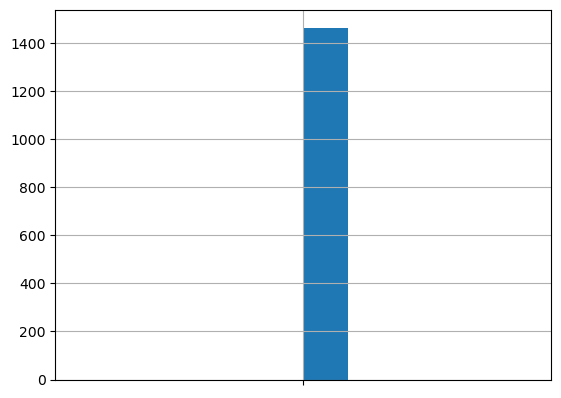

In [3]:
df['Status'].hist()

<Axes: >

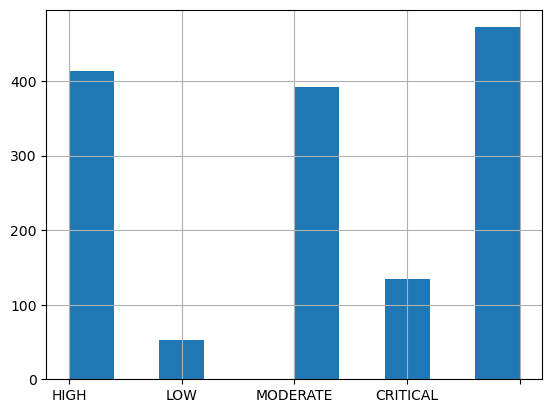

In [4]:
df['Severity'].hist()

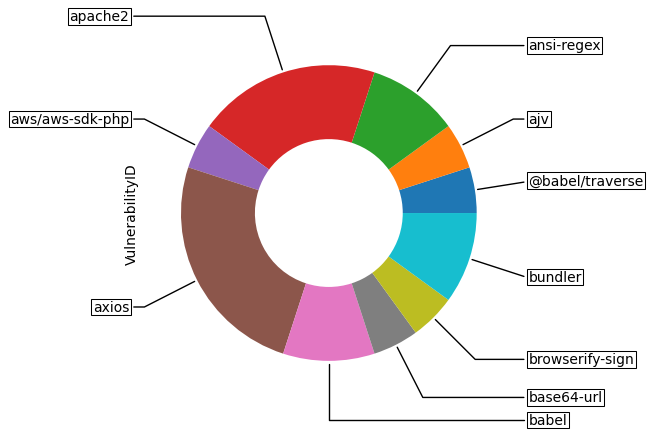

In [5]:
import numpy as np
import random
df_plot = df.groupby(['PkgName']).count().head(10)
axes = df_plot.plot.pie(y='VulnerabilityID', startangle=0, radius=1, legend=None, labels=None, wedgeprops=dict(width=0.5))
wedges = axes.patches
bbox_props = dict(boxstyle="square,pad=0.1", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center")

for i, p in enumerate(wedges):
    name_df = df_plot.iloc[[i]].index.tolist()[0]
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axes.annotate(name_df, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

In [6]:
containers = df['Container'].unique()

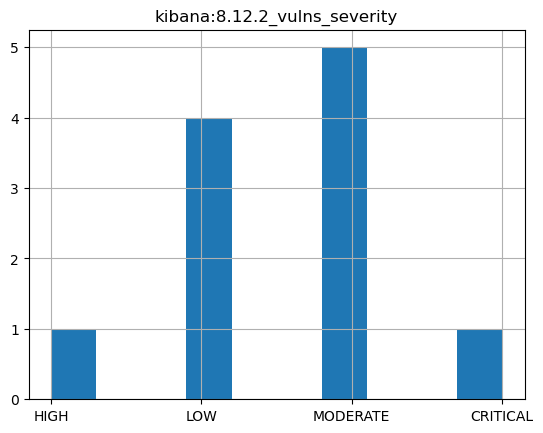

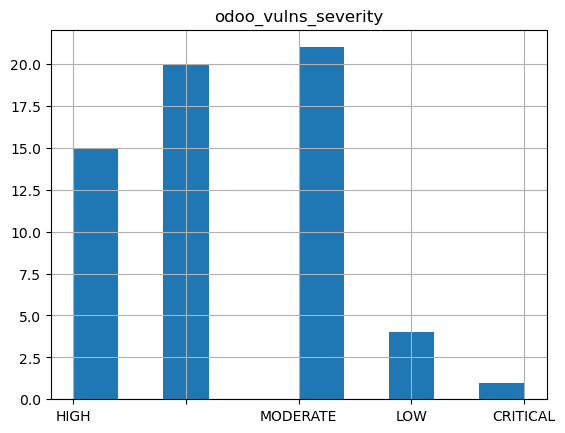

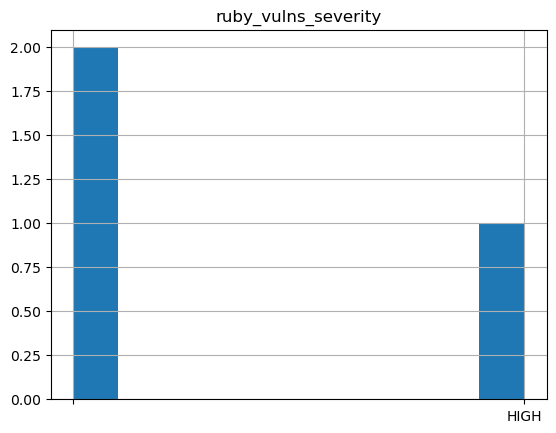

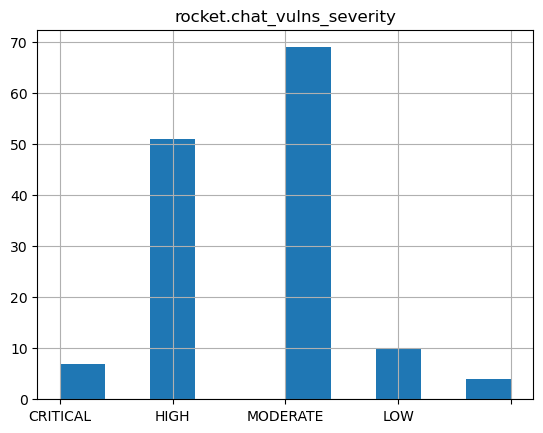

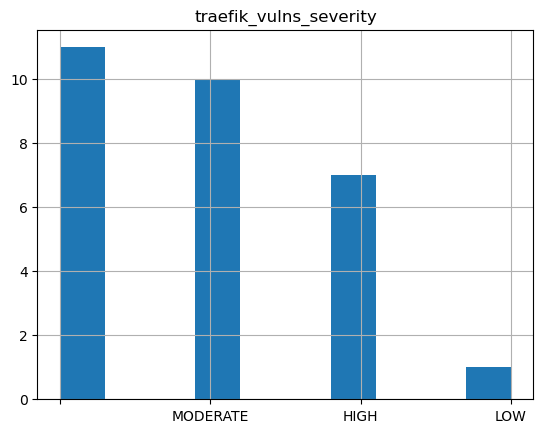

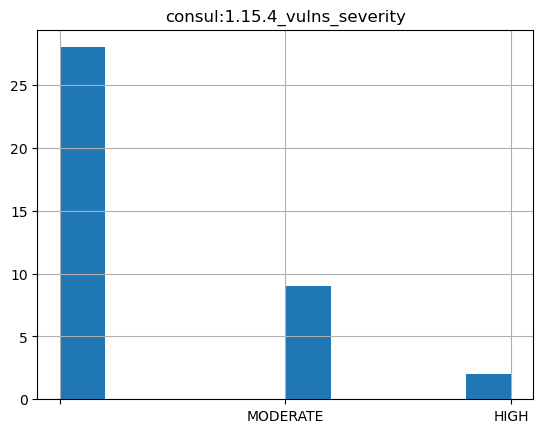

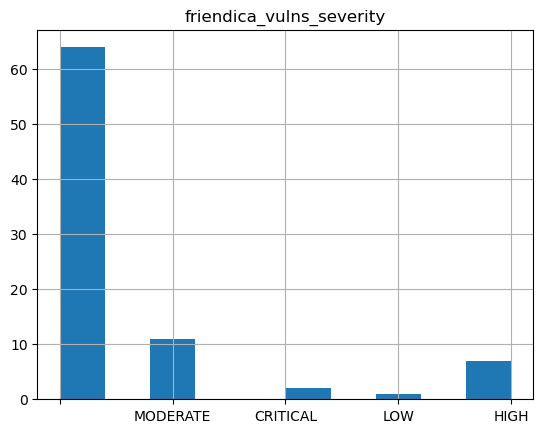

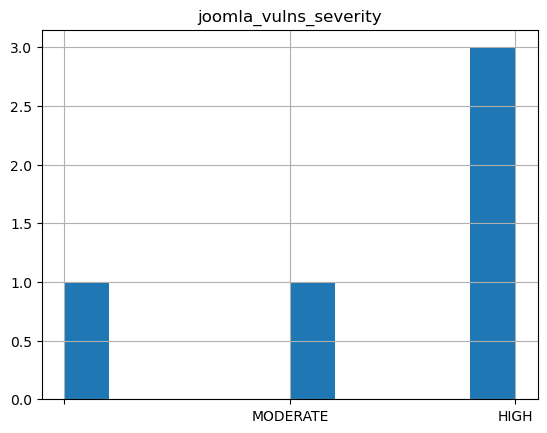

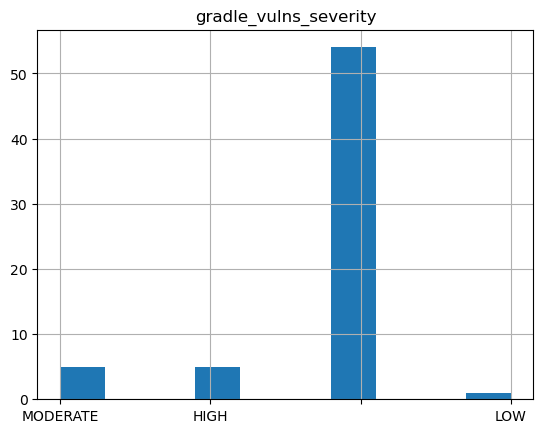

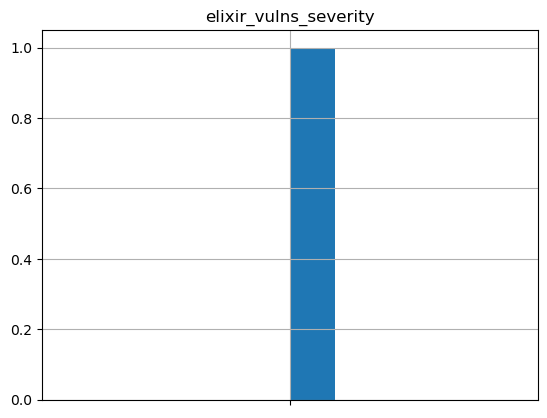

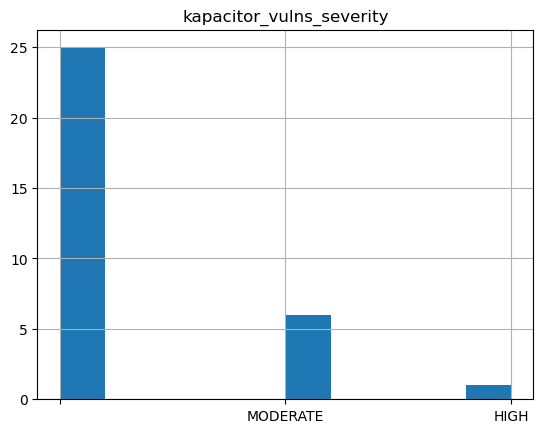

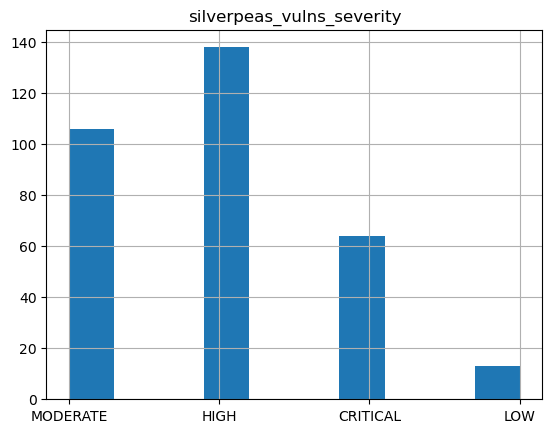

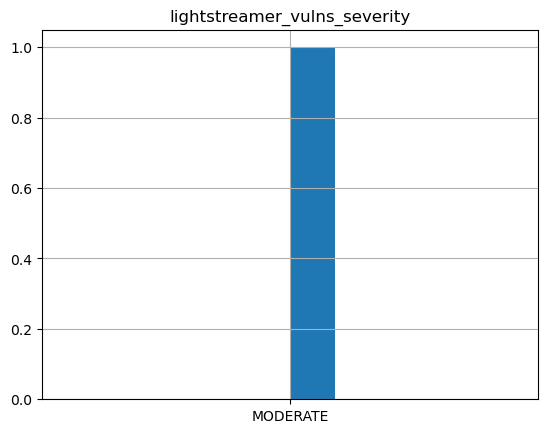

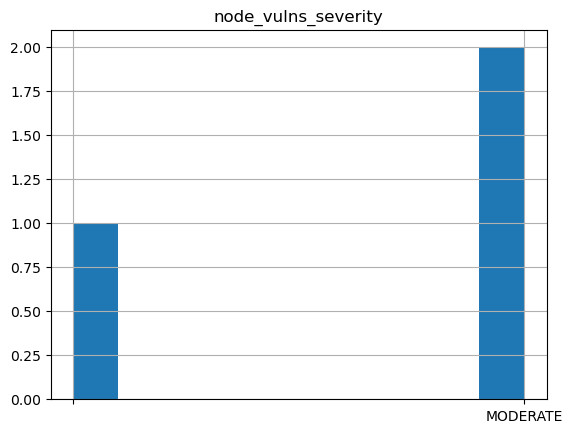

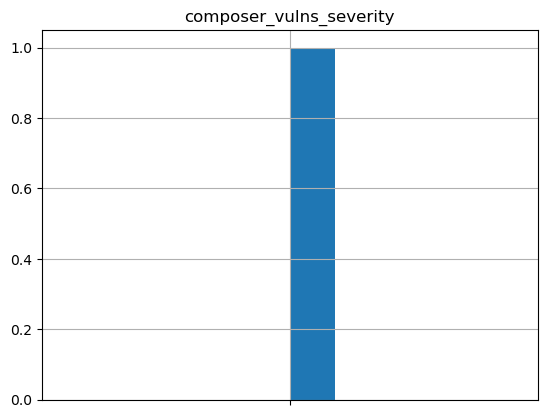

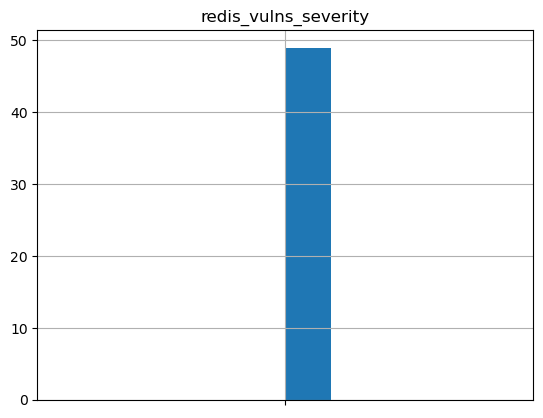

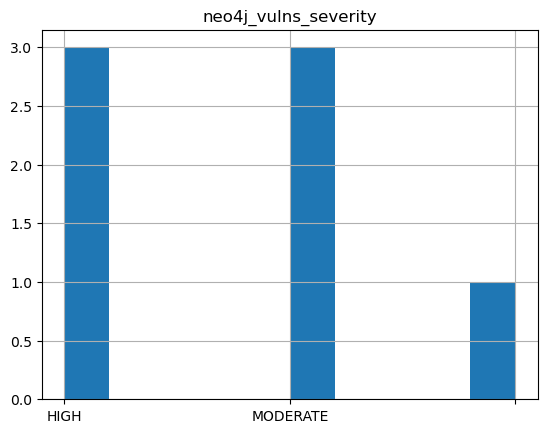

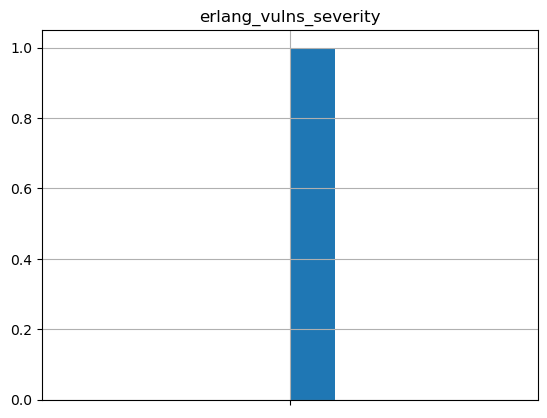

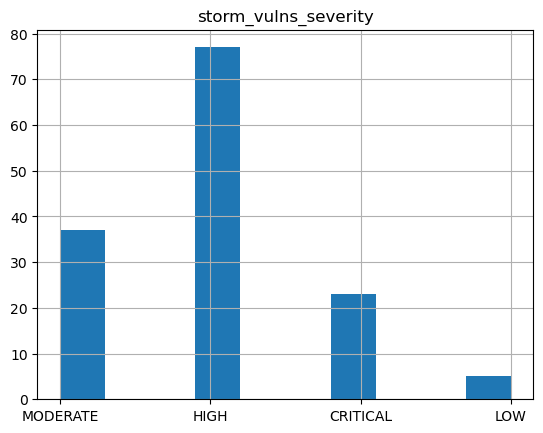

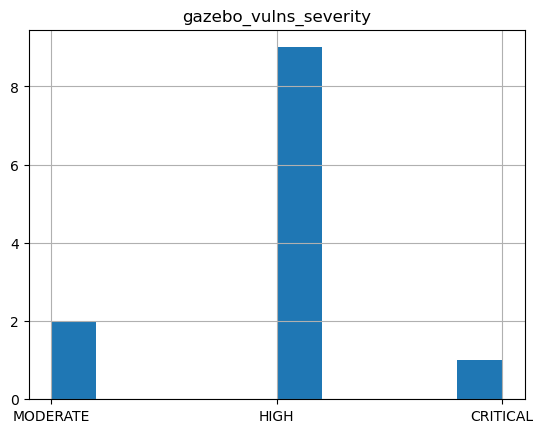

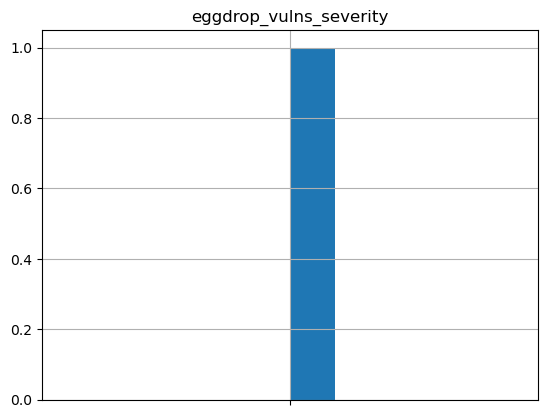

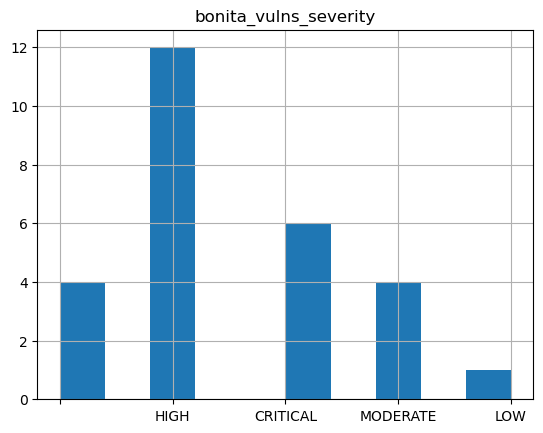

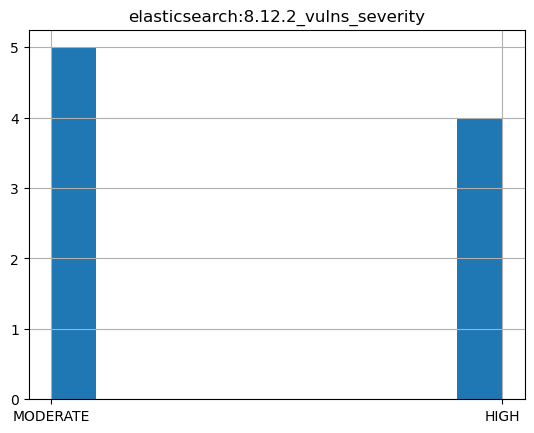

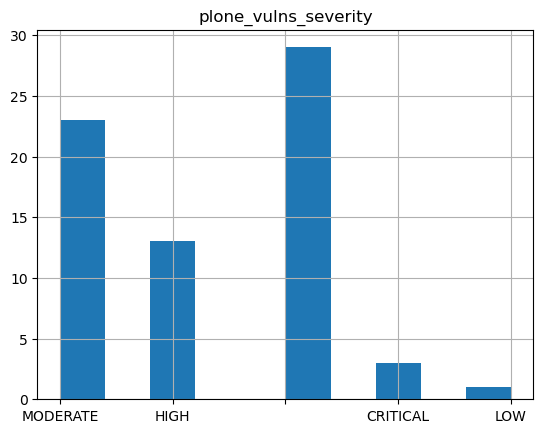

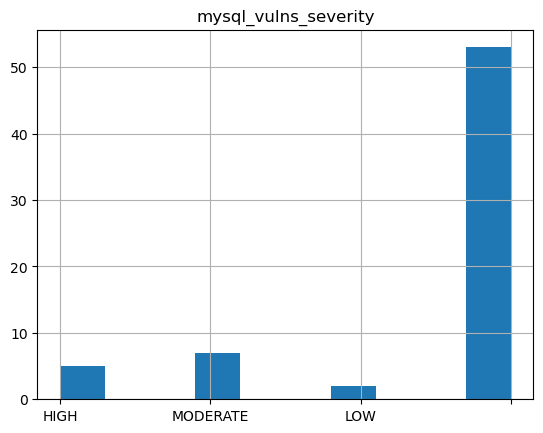

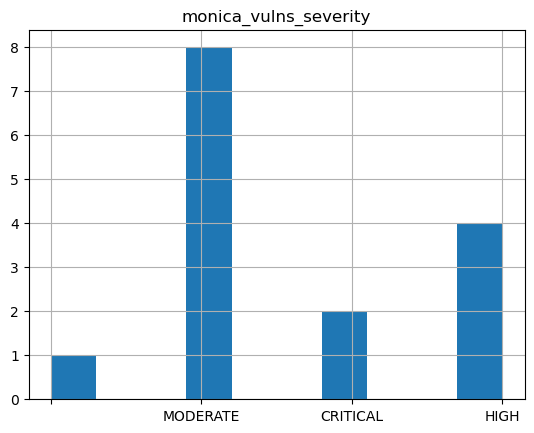

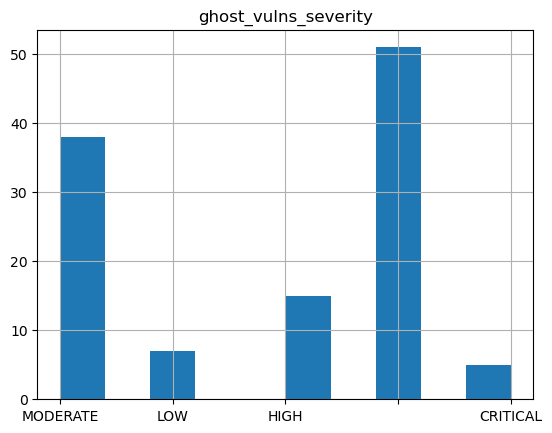

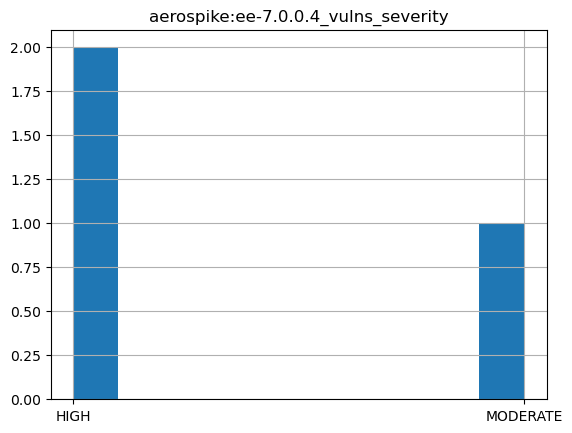

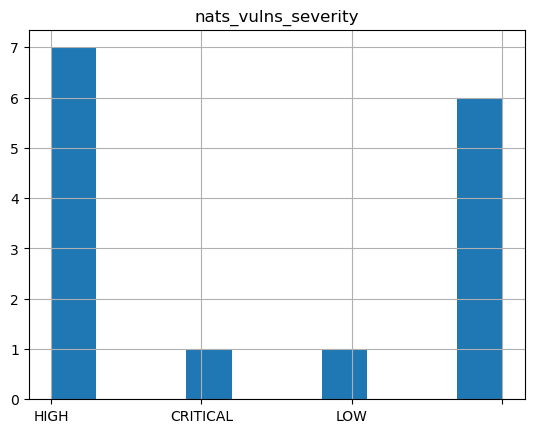

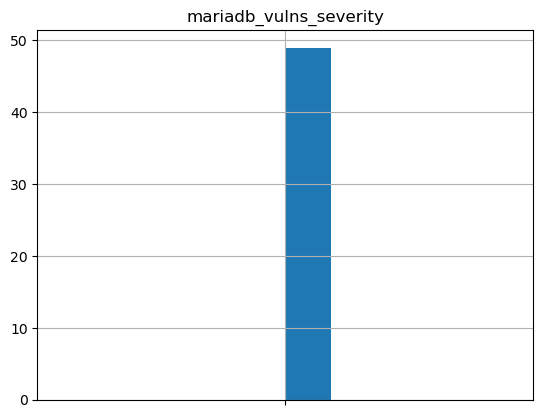

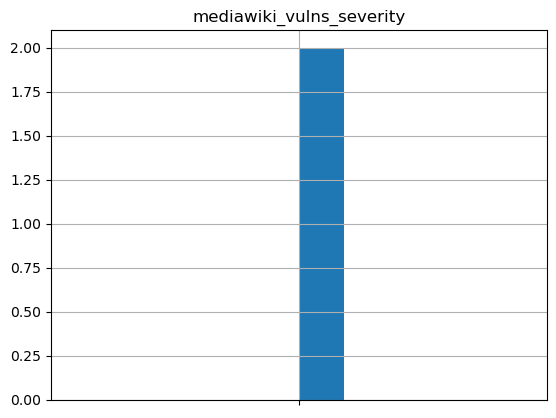

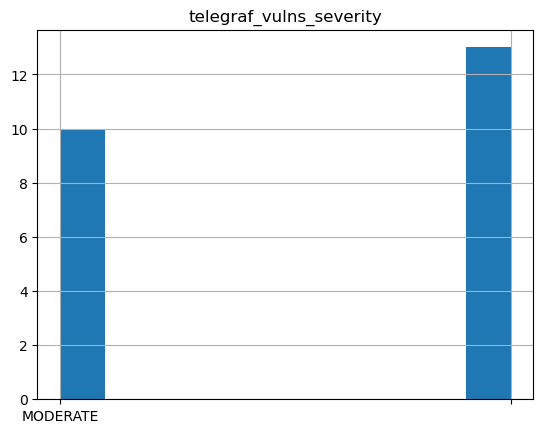

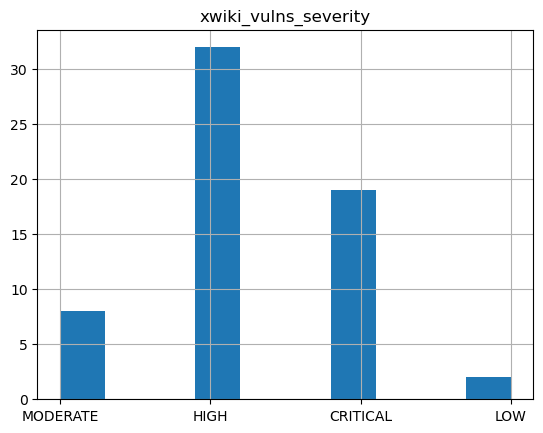

In [7]:
for container in containers:
    df.loc[df['Container'] == container]['Severity'].hist()
    plt.title(container+"_vulns_severity")
    plt.show()

In [10]:
len(df.loc[df['Severity'] == "HIGH"])

414

In [12]:
len(df.loc[df['Container'] == "ruby"])

3

In [15]:
dfa = df.loc[df['Container'] == "ruby"]
len(dfa.loc[dfa['Severity'] == "CRITICAL"])

0

In [6]:
print(df.loc[df['Container'].isin(["redis", "memcached", "node", "httpd", "rabbitmq", "mariadb", "nginx", "tomcat", "neo4j", 
           "gradle", "consul:1.15.4", "ruby", "flink", "docker.elastic.co/elasticsearch/elasticsearch:8.12.2", "kibana:8.12.2", "composer", "telegraf", 
           "sapmachine", "joomla", "groovy", "aerospike:ee-7.0.0.4_1", "kapacitor", "lightstreamer", "elixir", 
           "erlang", "mediawiki", "monica", "jetty", "odoo", "bonita", "irssi", "gazebo"])])

            VulnerabilityID               PkgName Status  Severity Container
0            CVE-2022-33987                   got         MODERATE      odoo
1            CVE-2022-25881  http-cache-semantics             HIGH      odoo
2            CVE-2023-42282                    ip         MODERATE      odoo
3            CVE-2022-29244                   npm             HIGH      odoo
4            CVE-2022-25883                semver         MODERATE      odoo
...                     ...                   ...    ...       ...       ...
1419  BIT-golang-2023-45290                stdlib                   telegraf
1420  BIT-golang-2023-45289                stdlib                   telegraf
1421  BIT-golang-2024-24784                stdlib                   telegraf
1422  BIT-golang-2024-24785                stdlib                   telegraf
1423  BIT-golang-2023-45288                stdlib                   telegraf

[439 rows x 5 columns]


In [3]:
df = df[~df['VulnerabilityID'].str.contains('CVE', na=False)]
print(df)
df = df[~df['VulnerabilityID'].str.contains('TEMP', na=False)]
print(df)

            VulnerabilityID        PkgName Status Severity Container   tool
13      GHSA-5cpq-8wj7-hf2v   cryptography             LOW      odoo  trivy
16      GHSA-jm77-qphf-c4w8   cryptography             LOW      odoo  trivy
17      GHSA-v8gr-m533-ghj9   cryptography             LOW      odoo  trivy
27    BIT-pillow-2023-50447         pillow            HIGH      odoo  trivy
29      GHSA-56pw-mpj4-fxww         pillow            HIGH      odoo  trivy
...                     ...            ...    ...      ...       ...    ...
1420  BIT-golang-2023-45289         stdlib                  telegraf  trivy
1421  BIT-golang-2024-24784         stdlib                  telegraf  trivy
1422  BIT-golang-2024-24785         stdlib                  telegraf  trivy
1423  BIT-golang-2023-45288         stdlib                  telegraf  trivy
1426    BIT-solr-2021-33813  org.jdom:jdom            HIGH     xwiki  trivy

[678 rows x 6 columns]
            VulnerabilityID        PkgName Status Severity Conta